In [1]:
# import necessary libraries 

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [37]:
def SMAGraph(stockData, shortWindow, longWindow, stockSymbol, movingAverage):   
    plt.figure(figsize=(20, 10))
    plt.tick_params(axis='both', labelsize=14)
    stockData['Close'].plot(color='k', lw=1, label='Close Price')
    stockData[shortWindow].plot(color='b', lw=1, label=shortWindow)
    stockData[longWindow].plot(color='g', lw=1, label=longWindow)
   
    plt.plot(stockData[stockData['Position'] == 1].index,
             stockData[shortWindow][stockData['Position'] == 1],
             '^', markersize=15, color='g', alpha=0.7, label='buy')
  
    plt.plot(stockData[stockData['Position'] == -1].index,
             stockData[shortWindow][stockData['Position'] == -1],
             'v', markersize=15, color='r', alpha=0.7, label='sell')
    plt.ylabel('Price in ₹', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.title(str(stockSymbol) + ' - ' + str(movingAverage) + ' Crossover', fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()

In [38]:
def SMATable(stockData):
        dataPostion = stockData[(stockData['Position'] == 1) | (stockData['Position'] == -1)]
        dataPostion['Position'] = dataPostion['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
        print(tabulate(dataPostion, headers='keys', tablefmt='psql'))
    

In [39]:
def MovingAverageCrossStrategy(stockData,stockSymbol,shortPeriod=20, longPeriod=50, movingAverage='SMA', table=True):
  
     
    shortWindow = str(shortPeriod) + '_' + movingAverage
    longWindow = str(longPeriod) + '_' + movingAverage

    if movingAverage == 'SMA':       
        stockData[shortWindow] = stockData['Close'].rolling(window=shortPeriod, min_periods=1).mean()
        stockData[longWindow] = stockData['Close'].rolling(window=longPeriod, min_periods=1).mean()

    elif movingAverage == 'EMA':
       
        stockData[shortWindow] = stockData['Close'].ewm(span=shortPeriod, adjust=False).mean()
        stockData[longWindow] = stockData['Close'].ewm(span=longPeriod, adjust=False).mean()

   
    stockData['Signal'] = 0.0
    stockData['Signal'] = np.where(stockData[shortWindow] > stockData[longWindow], 1.0, 0.0)
  
    stockData['Position'] = stockData['Signal'].diff()
    SMAGraph(stockData, shortWindow, longWindow, stockSymbol, movingAverage)
    if table :
        SMATable(stockData)

In [40]:
symbol = ["MSFT","GE","AAPL","ULTRACEMCO.NS"]
start = "01-01-2018"
end = "31-12-2020"
df = web.DataReader(name=symbol,data_source="yahoo",start=start,end=end)
df.to_csv("MA.csv")
df = pd.read_csv("MA.csv",header =[0,1],index_col=0,parse_dates=[0])
ge = df.swaplevel(axis = 1).GE.copy()
ms = df.swaplevel(axis = 1).MSFT.copy()
apple = df.swaplevel(axis = 1).AAPL.copy()
data = df.swaplevel(axis = 1)
ULTRACEMCO = data["ULTRACEMCO.NS"].copy()

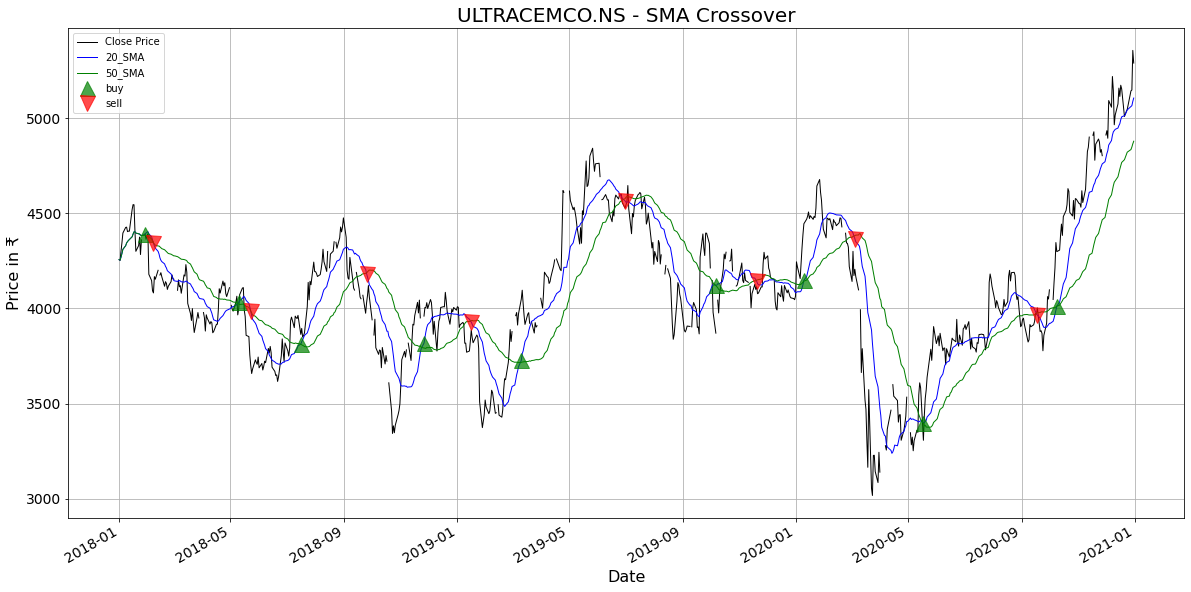

+---------------------+---------+----------+----------+----------+------------+
| Date                |   Close |   20_SMA |   50_SMA |   Signal | Position   |
|---------------------+---------+----------+----------+----------+------------|
| 2018-01-29 00:00:00 | 4390.7  |  4390.47 |  4383.75 |        1 | Buy        |
| 2018-02-07 00:00:00 | 4081.55 |  4342.36 |  4344.88 |        0 | Sell       |
| 2018-05-10 00:00:00 | 3998.55 |  4031.49 |  4022.59 |        1 | Buy        |
| 2018-05-23 00:00:00 | 3700.8  |  3984.98 |  3987.66 |        0 | Sell       |
| 2018-07-16 00:00:00 | 3864    |  3812.83 |  3812.47 |        1 | Buy        |
| 2018-09-25 00:00:00 | 4028.7  |  4183.01 |  4187.03 |        0 | Sell       |
| 2018-11-26 00:00:00 | 3959.85 |  3818.14 |  3792.42 |        1 | Buy        |
| 2019-01-16 00:00:00 | 3887    |  3928.54 |  3935.83 |        0 | Sell       |
| 2019-03-11 00:00:00 | 4049.15 |  3727.1  |  3716.93 |        1 | Buy        |
| 2019-07-01 00:00:00 | 4526.65 |  4564.

In [41]:
MovingAverageCrossStrategy(ULTRACEMCO[["Close"]],symbol[3])

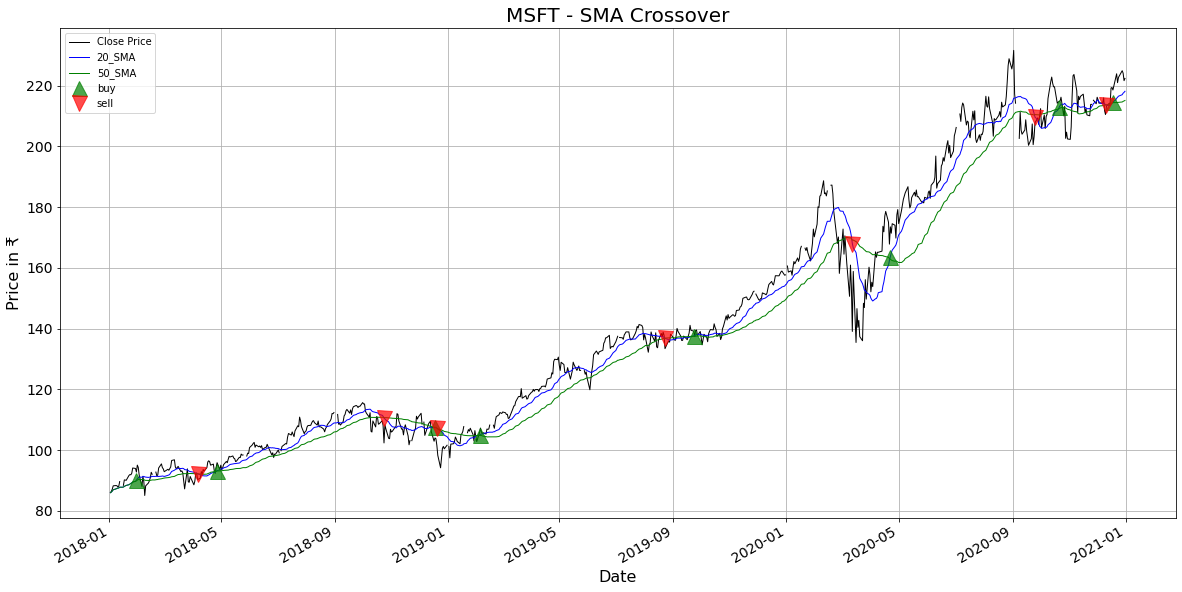

+---------------------+---------+----------+----------+----------+------------+
| Date                |   Close |   20_SMA |   50_SMA |   Signal | Position   |
|---------------------+---------+----------+----------+----------+------------|
| 2018-01-30 00:00:00 |   92.74 |  90.0326 |  89.8285 |        1 | Buy        |
| 2018-04-06 00:00:00 |   90.23 |  92.145  |  92.1586 |        0 | Sell       |
| 2018-04-27 00:00:00 |   95.82 |  93.1995 |  93.0665 |        1 | Buy        |
| 2018-10-24 00:00:00 |  102.32 | 110.545  | 110.651  |        0 | Sell       |
| 2018-12-18 00:00:00 |  103.97 | 107.456  | 107.36   |        1 | Buy        |
| 2018-12-20 00:00:00 |  101.51 | 107.174  | 107.217  |        0 | Sell       |
| 2019-02-04 00:00:00 |  105.74 | 104.887  | 104.78   |        1 | Buy        |
| 2019-08-23 00:00:00 |  133.39 | 136.76   | 136.871  |        0 | Sell       |
| 2019-09-23 00:00:00 |  139.14 | 137.6    | 137.449  |        1 | Buy        |
| 2020-03-12 00:00:00 |  139.06 | 168.00

In [42]:
MovingAverageCrossStrategy(ms[["Close"]],symbol[0])


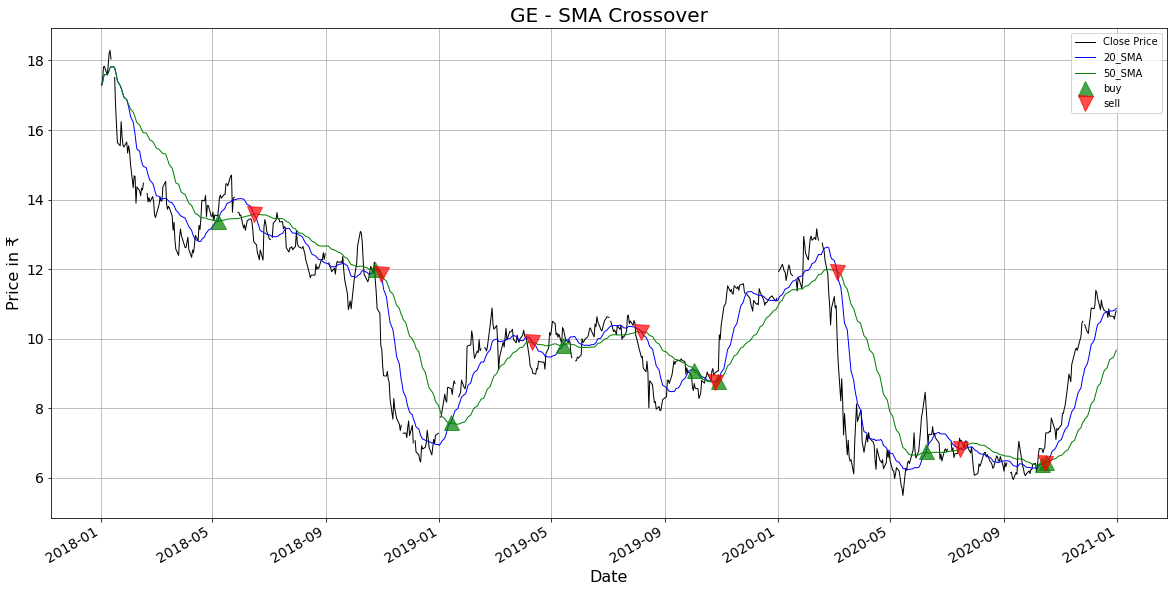

+---------------------+----------+----------+----------+----------+------------+
| Date                |    Close |   20_SMA |   50_SMA |   Signal | Position   |
|---------------------+----------+----------+----------+----------+------------|
| 2018-05-07 00:00:00 | 13.5288  | 13.3851  | 13.3781  |        1 | Buy        |
| 2018-06-15 00:00:00 | 12.7885  | 13.5698  | 13.5795  |        0 | Sell       |
| 2018-10-24 00:00:00 | 11.7019  | 12.0024  | 11.9923  |        1 | Buy        |
| 2018-10-30 00:00:00 |  9.78846 | 11.8683  | 11.8925  |        0 | Sell       |
| 2019-01-14 00:00:00 |  8.55769 |  7.60425 |  7.57304 |        1 | Buy        |
| 2019-04-11 00:00:00 |  9.12    |  9.9055  |  9.9093  |        0 | Sell       |
| 2019-05-14 00:00:00 | 10.32    |  9.804   |  9.8036  |        1 | Buy        |
| 2019-08-07 00:00:00 |  9.46    | 10.1905  | 10.1965  |        0 | Sell       |
| 2019-10-03 00:00:00 |  8.71    |  9.099   |  9.07    |        1 | Buy        |
| 2019-10-25 00:00:00 |  9  

In [43]:
MovingAverageCrossStrategy(ge[["Close"]],symbol[1])

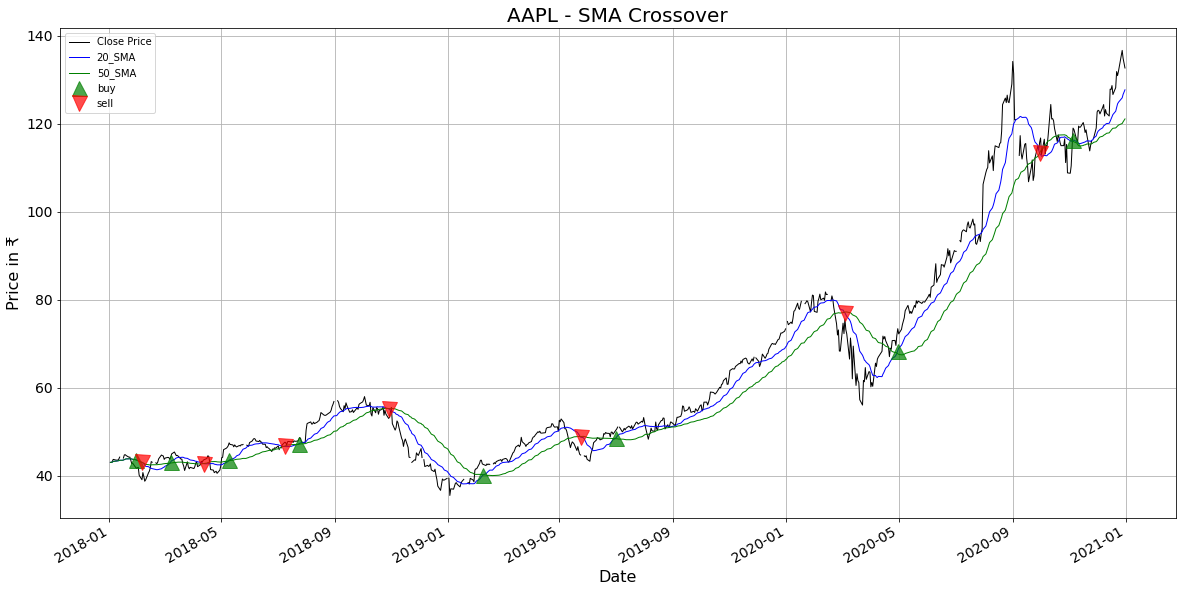

+---------------------+----------+----------+----------+----------+------------+
| Date                |    Close |   20_SMA |   50_SMA |   Signal | Position   |
|---------------------+----------+----------+----------+----------+------------|
| 2018-01-30 00:00:00 |  41.7425 |  43.6108 |  43.5835 |        1 | Buy        |
| 2018-02-05 00:00:00 |  39.1225 |  43.0528 |  43.1133 |        0 | Sell       |
| 2018-03-08 00:00:00 |  44.235  |  43.1489 |  42.9126 |        1 | Buy        |
| 2018-04-13 00:00:00 |  43.6825 |  42.7683 |  42.8278 |        0 | Sell       |
| 2018-05-10 00:00:00 |  47.51   |  43.5473 |  43.4297 |        1 | Buy        |
| 2018-07-09 00:00:00 |  47.645  |  46.7151 |  46.7599 |        0 | Sell       |
| 2018-07-24 00:00:00 |  48.25   |  47.2513 |  47.1928 |        1 | Buy        |
| 2018-10-29 00:00:00 |  53.06   |  55.2504 |  55.3148 |        0 | Sell       |
| 2019-02-08 00:00:00 |  42.6025 |  40.2445 |  40.2376 |        1 | Buy        |
| 2019-05-24 00:00:00 |  44.

In [44]:
MovingAverageCrossStrategy(apple[["Close"]],symbol[2])
